In [ ]:
### Joy Chepkwony
### Predict home prices

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
# Import the dataset
df = pd.read_csv('Assignment1/kc_house_data.csv')

# Descibe the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Check for missing data : no missing data in dataset

In [6]:
# Check for missing data
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


#### Create correlation heatmap

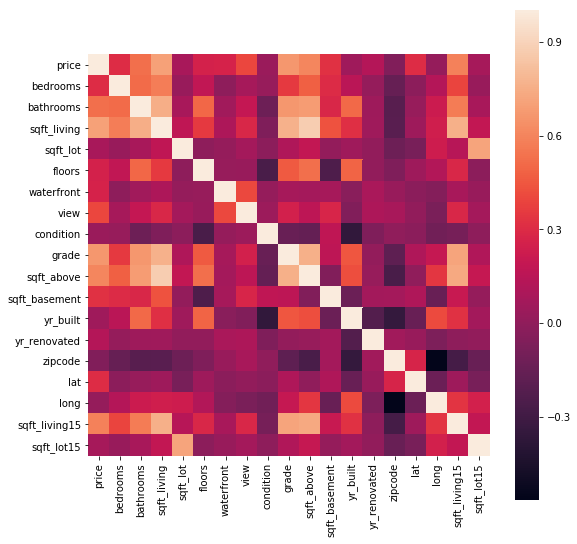

In [7]:
# Correlation heatmap
corr = df.select_dtypes(include = ['float', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr, vmax=1, square= True)

#### Correlation of features

In [8]:
# Correlation of features to price in sorted order
cor_dict = corr['price'].to_dict()
del cor_dict['price']
for e in sorted(cor_dict.items(), key = lambda x: - abs(x[1])):
    print('{0}: \t{1}'.format(*e))

sqft_living: 	0.7020350546118009
grade: 	0.667434256020255
sqft_above: 	0.6055672983560842
sqft_living15: 	0.5853789035795697
bathrooms: 	0.5251375054139724
view: 	0.3972934882944871
sqft_basement: 	0.323816020712004
bedrooms: 	0.3083495981456364
lat: 	0.307003479995218
waterfront: 	0.26636943403055346
floors: 	0.25679388755070176
yr_renovated: 	0.12643379344092243
sqft_lot: 	0.08966086058710003
sqft_lot15: 	0.08244715251948594
yr_built: 	0.05401153149478604
zipcode: 	-0.05320285429832495
condition: 	0.03636178912899409
long: 	0.02162624103930622


#### Plots 

<Figure size 432x288 with 0 Axes>

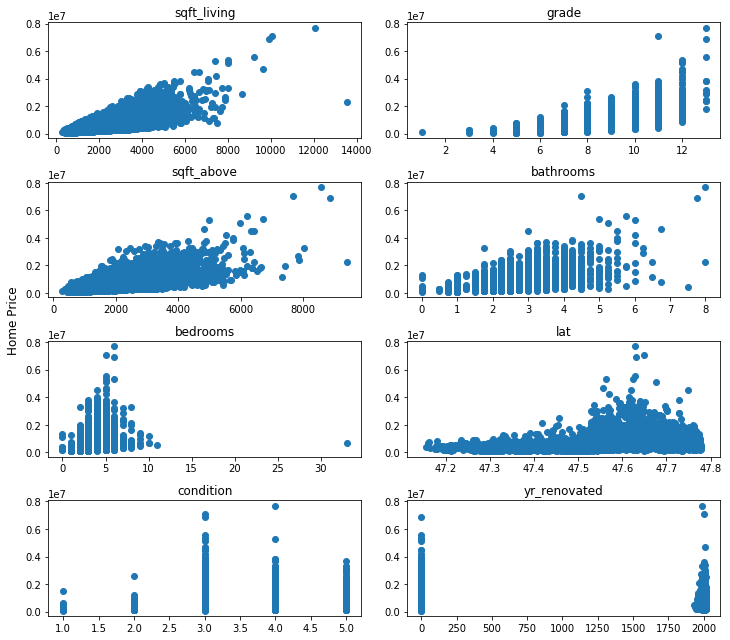

In [9]:
# Plot numeric features vs price    
plt.figure(1)
f, axarr = plt.subplots(4, 2, figsize=(10, 9))
price = df.price.values
axarr[0, 0].scatter(df.sqft_living.values, price)
axarr[0, 0].set_title('sqft_living')
axarr[0, 1].scatter(df.grade.values, price)
axarr[0, 1].set_title('grade')
axarr[1, 0].scatter(df.sqft_above.values, price)
axarr[1, 0].set_title('sqft_above')
axarr[1, 1].scatter(df['bathrooms'].values, price)
axarr[1, 1].set_title('bathrooms')
axarr[2, 0].scatter(df.bedrooms.values, price)
axarr[2, 0].set_title('bedrooms')
axarr[2, 1].scatter(df.lat.values, price)
axarr[2, 1].set_title('lat')
axarr[3, 0].scatter(df.condition.values, price)
axarr[3, 0].set_title('condition')
axarr[3, 1].scatter(df.yr_renovated.values, price)
axarr[3, 1].set_title('yr_renovated')
f.text(-0.01, 0.5, 'Home Price', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()


#### Other plots:
###### third plot shows strong correlation between waterfront, view and price

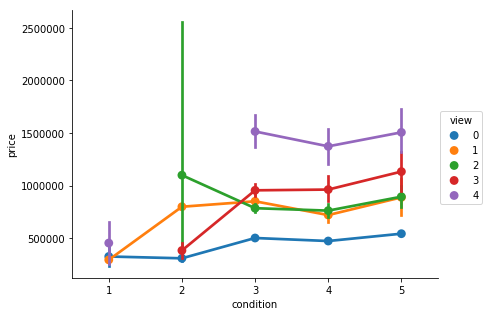

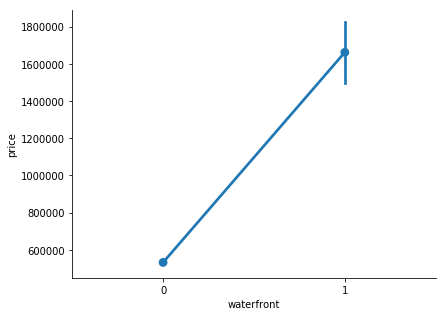

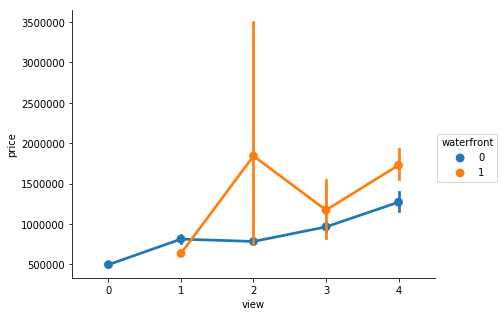

In [10]:
# Plot other features vs price
sns.factorplot('condition', 'price', hue = 'view', estimator = np.mean, data = df, size = 4.5, aspect = 1.4)
sns.factorplot('waterfront', 'price', estimator = np.mean, data = df, size = 4.5, aspect = 1.4)
sns.factorplot('view', 'price', hue = 'waterfront', estimator = np.mean, data = df, size = 4.5, aspect = 1.4)

#### Selected features based on correlation of features

In [11]:
feature_cols = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
                'grade','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
X = df[feature_cols].values
y = df['price'].values

##### No features eliminated using backward elimination below

In [12]:
# Get optimal features
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((21613, 1)).astype(int), values=X, axis=1)

# Backward elimination
X_opt = X[:, :]

def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((21613,93)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, :]
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3341.
Date:                Sat, 11 Aug 2018   Prob (F-statistic):               0.00
Time:                        11:59:18   Log-Likelihood:            -2.9463e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21597   BIC:                         5.894e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.32e+06   2.88e+06      3.231      0.0

#### Split dataset to train and test

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Model Selection
#### Multiple Linear Regression

In [14]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# RMSE
cv_score = cross_val_score(regressor, X_train, y_train, cv = 5, n_jobs = -1)
print('Model: Multiple Linear Regression')
print('CV Score: ', np.mean(cv_score))

# Print RMSE
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))

Model: Multiple Linear Regression
CV Score:  0.6951155661244819
RMSE:  190299.99675965484


#### Decision Tree Regression

In [15]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# RMSE
cv_score = cross_val_score(regressor, X_train, y_train, cv = 5, n_jobs = -1)
print('Model: Decision Tree Regression')
print('CV Score: ', np.mean(cv_score))

# Print RMSE
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))

Model: Decision Tree Regression
CV Score:  0.7074544769451736
RMSE:  157992.96913601513


#### Random Forest Regression

In [16]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# RMSE
cv_score = cross_val_score(regressor, X_train, y_train, cv = 5)
print('Model: Random Forest Tree Regression')
print('CV Score: ', np.mean(cv_score))

# Print RMSE
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))

Model: Random Forest Tree Regression
CV Score:  0.8384000621074366
RF RMSE 119409.11405957557


#### XGBoost

In [18]:
# Fitting XGBoost to the dataset
#from xgboost.sklearn import XGBRegressor

# Initialize model
regressor = XGBRegressor(learning_rate=0.05,n_estimators=500,max_depth=3,colsample_bytree=0.4)                  

# Fit the model on our data
regressor.fit(X_train, y_train)

# Predict training set
y_pred = regressor.predict(X_train)

cv_score = cross_val_score(regressor, X_train, y_train, cv = 5)
print('Model: Random Forest Tree Regression')
print('CV Score: ', np.mean(cv_score))

# Print RMSE
print('RMSE: ', sqrt(mean_squared_error(y_train, y_pred)))

Model: Random Forest Tree Regression
CV Score:  0.8662132919531731
RMSE:  107043.61531484038


#### Model Selected: XGBOOST
##### XGBoost has the highest cs score  and lowest rmse